<a href="https://colab.research.google.com/github/HoagondeAmedegnato/Banks-Historical-Stock-Price-Portfolio/blob/main/03_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**BANKS HISTORICAL STOCK PRICE**

Data Source: https://www.kaggle.com/tomasmantero/banks-historical-stock-price

***KPI: Help Investors Make Important Decisions And Predict New Trends***

author = Hoagonde Amedegnato

email = amereine69@gmail.com

# **PREDICT BANKS STOCKS FUTURE PRICES USING MACHINE LEARNING (ML) AND DEEP LEARNING (DL)**

- In this task, I will train a ridge regression model and deep neural network model to predict future stock prices
- By accurately predicting stock prices, investors can maximize returns and know when to buy/sell securities
- The AI/ML model will be trained using historical stock price data along with the volume of transaction
- I will use a type of neural nets known as Long Short-Term Memory Networks (LSTM)

In [82]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
# Import Libraries
import pandas as pd
import seaborn as sns
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

In [84]:
# Import libraries
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow import keras

# *Load and Read Data*

In [85]:
BAC = pd.read_csv('/content/drive/MyDrive/Banks Stock Price/BAC (2).csv')
BAC

,Date,High,Low,Open,Close,Volume,Adj Close
0,2006-01-03,47.180000,46.150002,46.919998,47.080002,16296700.0,34.811729
1,2006-01-04,47.240002,46.450001,47.000000,46.580002,17757900.0,34.442013
2,2006-01-05,46.830002,46.320000,46.580002,46.639999,14970700.0,34.486385
3,2006-01-06,46.910000,46.349998,46.799999,46.570000,12599800.0,34.434616
4,2006-01-09,46.970001,46.360001,46.720001,46.599998,15619400.0,34.456806
...,...,...,...,...,...,...,...
3744,2020-11-16,28.000000,27.180000,27.860001,27.580000,57396700.0,27.580000
3745,2020-11-17,27.600000,27.010000,27.250000,27.549999,46402300.0,27.549999
3746,2020-11-18,27.930000,26.959999,27.629999,26.980000,54416700.0,26.980000
3747,2020-11-19,27.010000,26.650000,26.930000,26.980000,46423000.0,26.980000


In [86]:
C = pd.read_csv('/content/drive/MyDrive/Banks Stock Price/C.csv')
C

,Date,High,Low,Open,Close,Volume,Adj Close
0,2006-01-03,493.799988,481.100006,490.000000,492.899994,1537600.0,379.511047
1,2006-01-04,491.000000,483.500000,488.600006,483.799988,1870900.0,372.504486
2,2006-01-05,487.799988,484.000000,484.399994,486.200012,1143100.0,374.352448
3,2006-01-06,489.000000,482.000000,488.799988,486.200012,1370200.0,374.352448
4,2006-01-09,487.399994,483.000000,486.000000,483.899994,1680700.0,372.581421
...,...,...,...,...,...,...,...
3744,2020-11-16,51.020000,49.860001,50.410000,50.400002,26699400.0,50.400002
3745,2020-11-17,50.930000,49.480000,49.840000,50.730000,18970000.0,50.730000
3746,2020-11-18,52.650002,51.009998,51.090000,51.049999,25824000.0,51.049999
3747,2020-11-19,52.320000,50.950001,51.599998,52.139999,20262400.0,52.139999


In [87]:
GS = pd.read_csv('/content/drive/MyDrive/Banks Stock Price/GS.csv')
GS

,Date,High,Low,Open,Close,Volume,Adj Close
0,2006-01-03,129.440002,124.230003,126.699997,128.869995,6188700.0,106.263367
1,2006-01-04,128.910004,126.379997,127.349998,127.089996,4861600.0,104.795609
2,2006-01-05,127.320000,125.610001,126.000000,127.040001,3717400.0,104.754387
3,2006-01-06,129.250000,127.290001,127.290001,128.839996,4319600.0,106.238571
4,2006-01-09,130.619995,128.000000,128.500000,130.389999,4723500.0,107.516731
...,...,...,...,...,...,...,...
3744,2020-11-16,224.600006,220.029999,223.529999,222.380005,3004700.0,222.380005
3745,2020-11-17,224.850006,218.330002,220.020004,224.649994,2722900.0,224.649994
3746,2020-11-18,227.720001,223.509995,225.000000,224.300003,2856200.0,224.300003
3747,2020-11-19,224.940002,222.110001,224.300003,224.570007,1505200.0,224.570007


In [88]:
JPM = pd.read_csv('/content/drive/MyDrive/Banks Stock Price/JPM.csv')
JPM

,Date,High,Low,Open,Close,Volume,Adj Close
0,2006-01-03,40.360001,39.299999,39.830002,40.189999,12838600.0,27.013376
1,2006-01-04,40.139999,39.419998,39.779999,39.619999,13491500.0,26.857462
2,2006-01-05,39.810001,39.500000,39.610001,39.740002,8109400.0,26.938803
3,2006-01-06,40.240002,39.549999,39.919998,40.020000,7966900.0,27.128614
4,2006-01-09,40.720001,39.880001,39.880001,40.669998,16575200.0,27.569229
...,...,...,...,...,...,...,...
3744,2020-11-16,118.610001,115.730003,117.790001,117.300003,19858600.0,117.300003
3745,2020-11-17,116.440002,114.580002,115.389999,116.110001,14553200.0,116.110001
3746,2020-11-18,118.610001,115.199997,117.339996,115.250000,12571200.0,115.250000
3747,2020-11-19,115.820000,113.559998,114.180000,115.559998,10202500.0,115.559998


In [89]:
MS = pd.read_csv('/content/drive/MyDrive/Banks Stock Price/MS.csv')
MS

,Date,High,Low,Open,Close,Volume,Adj Close
0,2006-01-03,58.490002,56.740002,57.169998,58.310001,5377000.0,36.867344
1,2006-01-04,59.279999,58.349998,58.700001,58.349998,7977800.0,36.892612
2,2006-01-05,58.590000,58.020000,58.549999,58.509998,5778000.0,36.993786
3,2006-01-06,58.849998,58.049999,58.770000,58.570000,6889800.0,37.031731
4,2006-01-09,59.290001,58.619999,58.630001,59.189999,4144500.0,37.423725
...,...,...,...,...,...,...,...
3744,2020-11-16,58.139999,57.029999,57.759998,58.110001,12201400.0,58.110001
3745,2020-11-17,58.889999,57.200001,57.509998,58.810001,9599100.0,58.810001
3746,2020-11-18,60.130001,58.770000,59.000000,58.810001,11536700.0,58.810001
3747,2020-11-19,58.689999,57.860001,58.560001,58.630001,7220200.0,58.630001


In [90]:
WFC = pd.read_csv('/content/drive/MyDrive/Banks Stock Price/WFC (1).csv')
WFC

,Date,High,Low,Open,Close,Volume,Adj Close
0,2006-01-03,31.975000,31.195000,31.600000,31.900000,11016400.0,20.723480
1,2006-01-04,31.820000,31.365000,31.799999,31.530001,10870000.0,20.483118
2,2006-01-05,31.555000,31.309999,31.500000,31.495001,10158000.0,20.460379
3,2006-01-06,31.775000,31.385000,31.580000,31.680000,8403800.0,20.580564
4,2006-01-09,31.825001,31.555000,31.674999,31.674999,5619600.0,20.577309
...,...,...,...,...,...,...,...
3744,2020-11-16,25.030001,24.389999,24.990000,24.900000,36954800.0,24.900000
3745,2020-11-17,25.150000,24.520000,24.530001,25.040001,29490400.0,25.040001
3746,2020-11-18,25.950001,25.059999,25.150000,25.059999,44318300.0,25.059999
3747,2020-11-19,26.219999,24.969999,25.190001,26.160000,44560000.0,26.160000


In [91]:
# Let's create a list for all banks stocks 
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [92]:
# Let's use pd.concat to concatenate all these bank stocks together into a single dataframe
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis = 1, keys = tickers)
bank_stocks

BAC                        ...        WFC                       
            Date       High        Low  ...      Close      Volume  Adj Close
0     2006-01-03  47.180000  46.150002  ...  31.900000  11016400.0  20.723480
1     2006-01-04  47.240002  46.450001  ...  31.530001  10870000.0  20.483118
2     2006-01-05  46.830002  46.320000  ...  31.495001  10158000.0  20.460379
3     2006-01-06  46.910000  46.349998  ...  31.680000   8403800.0  20.580564
4     2006-01-09  46.970001  46.360001  ...  31.674999   5619600.0  20.577309
...          ...        ...        ...  ...        ...         ...        ...
3744  2020-11-16  28.000000  27.180000  ...  24.900000  36954800.0  24.900000
3745  2020-11-17  27.600000  27.010000  ...  25.040001  29490400.0  25.040001
3746  2020-11-18  27.930000  26.959999  ...  25.059999  44318300.0  25.059999
3747  2020-11-19  27.010000  26.650000  ...  26.160000  44560000.0  26.160000
3748  2020-11-20  26.950001  26.629999  ...  25.480000  38425200.0  25.480000

[3749 rows x 42 columns]

# *Create Bank Stocks Price (Close) DataFrame*

In [93]:
BAC = bank_stocks['BAC', 'Close']
BAC

0       47.080002
1       46.580002
2       46.639999
3       46.570000
4       46.599998
          ...    
3744    27.580000
3745    27.549999
3746    26.980000
3747    26.980000
3748    26.809999
Name: (BAC, Close), Length: 3749, dtype: float64

In [94]:
C = bank_stocks['C', 'Close']
C

0       492.899994
1       483.799988
2       486.200012
3       486.200012
4       483.899994
           ...    
3744     50.400002
3745     50.730000
3746     51.049999
3747     52.139999
3748     51.650002
Name: (C, Close), Length: 3749, dtype: float64

In [95]:
GS = bank_stocks['GS', 'Close']
GS

0       128.869995
1       127.089996
2       127.040001
3       128.839996
4       130.389999
           ...    
3744    222.380005
3745    224.649994
3746    224.300003
3747    224.570007
3748    223.350006
Name: (GS, Close), Length: 3749, dtype: float64

In [96]:
JPM = bank_stocks['JPM', 'Close']
JPM

0        40.189999
1        39.619999
2        39.740002
3        40.020000
4        40.669998
           ...    
3744    117.300003
3745    116.110001
3746    115.250000
3747    115.559998
3748    114.570000
Name: (JPM, Close), Length: 3749, dtype: float64

In [97]:
MS = bank_stocks['MS', 'Close']
MS

0       58.310001
1       58.349998
2       58.509998
3       58.570000
4       59.189999
          ...    
3744    58.110001
3745    58.810001
3746    58.810001
3747    58.630001
3748    57.810001
Name: (MS, Close), Length: 3749, dtype: float64

In [98]:
WFC = bank_stocks['WFC', 'Close']
WFC

0       31.900000
1       31.530001
2       31.495001
3       31.680000
4       31.674999
          ...    
3744    24.900000
3745    25.040001
3746    25.059999
3747    26.160000
3748    25.480000
Name: (WFC, Close), Length: 3749, dtype: float64

In [99]:
# Since all banks have the same Date, let's select the date column to concatenate 
DATE = bank_stocks['C', 'Date']
DATE

0       2006-01-03
1       2006-01-04
2       2006-01-05
3       2006-01-06
4       2006-01-09
           ...    
3744    2020-11-16
3745    2020-11-17
3746    2020-11-18
3747    2020-11-19
3748    2020-11-20
Name: (C, Date), Length: 3749, dtype: object

In [100]:
# Let's create a list for all banks stocks Price using close column
tickers_close = ['DATE', 'BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [101]:
# Let's use pd.concat to concatenate all these bank stocks close column together into a single dataframe
bank_stocks_close = pd.concat([DATE, BAC, C, GS, JPM, MS, WFC], axis = 1, keys = tickers_close)
bank_stocks_close

,DATE,BAC,C,GS,JPM,MS,WFC
0,2006-01-03,47.080002,492.899994,128.869995,40.189999,58.310001,31.900000
1,2006-01-04,46.580002,483.799988,127.089996,39.619999,58.349998,31.530001
2,2006-01-05,46.639999,486.200012,127.040001,39.740002,58.509998,31.495001
3,2006-01-06,46.570000,486.200012,128.839996,40.020000,58.570000,31.680000
4,2006-01-09,46.599998,483.899994,130.389999,40.669998,59.189999,31.674999
...,...,...,...,...,...,...,...
3744,2020-11-16,27.580000,50.400002,222.380005,117.300003,58.110001,24.900000
3745,2020-11-17,27.549999,50.730000,224.649994,116.110001,58.810001,25.040001
3746,2020-11-18,26.980000,51.049999,224.300003,115.250000,58.810001,25.059999
3747,2020-11-19,26.980000,52.139999,224.570007,115.559998,58.630001,26.160000


## *Create Bank Stocks Volume DataFrame*

In [102]:
BAC = bank_stocks['BAC', 'Volume']
BAC

0       16296700.0
1       17757900.0
2       14970700.0
3       12599800.0
4       15619400.0
           ...    
3744    57396700.0
3745    46402300.0
3746    54416700.0
3747    46423000.0
3748    40513900.0
Name: (BAC, Volume), Length: 3749, dtype: float64

In [103]:
C = bank_stocks['C', 'Volume']
C

0        1537600.0
1        1870900.0
2        1143100.0
3        1370200.0
4        1680700.0
           ...    
3744    26699400.0
3745    18970000.0
3746    25824000.0
3747    20262400.0
3748    15471100.0
Name: (C, Volume), Length: 3749, dtype: float64

In [104]:
GS = bank_stocks['GS', 'Volume']
GS

0       6188700.0
1       4861600.0
2       3717400.0
3       4319600.0
4       4723500.0
          ...    
3744    3004700.0
3745    2722900.0
3746    2856200.0
3747    1505200.0
3748    1848100.0
Name: (GS, Volume), Length: 3749, dtype: float64

In [105]:
JPM = bank_stocks['JPM', 'Volume']
JPM

0       12838600.0
1       13491500.0
2        8109400.0
3        7966900.0
4       16575200.0
           ...    
3744    19858600.0
3745    14553200.0
3746    12571200.0
3747    10202500.0
3748    12718900.0
Name: (JPM, Volume), Length: 3749, dtype: float64

In [106]:
MS = bank_stocks['MS', 'Volume']
MS

0        5377000.0
1        7977800.0
2        5778000.0
3        6889800.0
4        4144500.0
           ...    
3744    12201400.0
3745     9599100.0
3746    11536700.0
3747     7220200.0
3748     7739900.0
Name: (MS, Volume), Length: 3749, dtype: float64

In [107]:
WFC = bank_stocks['WFC', 'Volume']
WFC

0       11016400.0
1       10870000.0
2       10158000.0
3        8403800.0
4        5619600.0
           ...    
3744    36954800.0
3745    29490400.0
3746    44318300.0
3747    44560000.0
3748    38425200.0
Name: (WFC, Volume), Length: 3749, dtype: float64

In [108]:
# Since all banks have the same Date, let's select the date column to concatenate 
DATE = bank_stocks['GS', 'Date']
DATE

0       2006-01-03
1       2006-01-04
2       2006-01-05
3       2006-01-06
4       2006-01-09
           ...    
3744    2020-11-16
3745    2020-11-17
3746    2020-11-18
3747    2020-11-19
3748    2020-11-20
Name: (GS, Date), Length: 3749, dtype: object

In [109]:
# Let's create a list for all banks stocks using volume column
tickers_volume = ['DATE', 'BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [110]:
# Let's use pd.concat to concatenate all these bank stocks volume column together into a single dataframe
bank_stocks_volume = pd.concat([DATE, BAC, C, GS, JPM, MS, WFC], axis = 1, keys = tickers_volume)
bank_stocks_volume

,DATE,BAC,C,GS,JPM,MS,WFC
0,2006-01-03,16296700.0,1537600.0,6188700.0,12838600.0,5377000.0,11016400.0
1,2006-01-04,17757900.0,1870900.0,4861600.0,13491500.0,7977800.0,10870000.0
2,2006-01-05,14970700.0,1143100.0,3717400.0,8109400.0,5778000.0,10158000.0
3,2006-01-06,12599800.0,1370200.0,4319600.0,7966900.0,6889800.0,8403800.0
4,2006-01-09,15619400.0,1680700.0,4723500.0,16575200.0,4144500.0,5619600.0
...,...,...,...,...,...,...,...
3744,2020-11-16,57396700.0,26699400.0,3004700.0,19858600.0,12201400.0,36954800.0
3745,2020-11-17,46402300.0,18970000.0,2722900.0,14553200.0,9599100.0,29490400.0
3746,2020-11-18,54416700.0,25824000.0,2856200.0,12571200.0,11536700.0,44318300.0
3747,2020-11-19,46423000.0,20262400.0,1505200.0,10202500.0,7220200.0,44560000.0


# *Prepare The Data Before Taining the AI/ML Model*

- Data is divided into 65% for training and 35% for testing
- Training set: used for model training
- Testing set: used for testing model.

In [111]:
# Function to concatenate the date, stock price, and volume in one dataframe
def individual_stock(bank_stocks_close, bank_stocks_volume, name):
    return pd.DataFrame({'DATE': bank_stocks_close['DATE'], 'Close': bank_stocks_close[name], 'Volume': bank_stocks_volume[name]})

In [112]:
# Function to return the input/output (target) data for AI/ML Model
# Note that my goal is to predict the future stock price 
# Target stock price today will be tomorrow's price 
def trading_window(data):
  
  # 1 day window 
  n = 1

  # Create a column containing the prices for the next 1 day
  data['Target'] = data[['Close']].shift(-n)
  
  # return the new dataset 
  return data

In [113]:
# Let's test the functions and get individual stock prices and volumes for CitiGroup
price_volume_df = individual_stock(bank_stocks_close, bank_stocks_volume, 'C')
price_volume_df

,DATE,Close,Volume
0,2006-01-03,492.899994,1537600.0
1,2006-01-04,483.799988,1870900.0
2,2006-01-05,486.200012,1143100.0
3,2006-01-06,486.200012,1370200.0
4,2006-01-09,483.899994,1680700.0
...,...,...,...
3744,2020-11-16,50.400002,26699400.0
3745,2020-11-17,50.730000,18970000.0
3746,2020-11-18,51.049999,25824000.0
3747,2020-11-19,52.139999,20262400.0


In [114]:
price_volume_target_df = trading_window(price_volume_df)
price_volume_target_df

,DATE,Close,Volume,Target
0,2006-01-03,492.899994,1537600.0,483.799988
1,2006-01-04,483.799988,1870900.0,486.200012
2,2006-01-05,486.200012,1143100.0,486.200012
3,2006-01-06,486.200012,1370200.0,483.899994
4,2006-01-09,483.899994,1680700.0,485.399994
...,...,...,...,...
3744,2020-11-16,50.400002,26699400.0,50.730000
3745,2020-11-17,50.730000,18970000.0,51.049999
3746,2020-11-18,51.049999,25824000.0,52.139999
3747,2020-11-19,52.139999,20262400.0,51.650002


In [115]:
# Remove the last row as it will be a null value
price_volume_target_df = price_volume_target_df[:-1]
price_volume_target_df

,DATE,Close,Volume,Target
0,2006-01-03,492.899994,1537600.0,483.799988
1,2006-01-04,483.799988,1870900.0,486.200012
2,2006-01-05,486.200012,1143100.0,486.200012
3,2006-01-06,486.200012,1370200.0,483.899994
4,2006-01-09,483.899994,1680700.0,485.399994
...,...,...,...,...
3743,2020-11-13,48.660000,18632500.0,50.400002
3744,2020-11-16,50.400002,26699400.0,50.730000
3745,2020-11-17,50.730000,18970000.0,51.049999
3746,2020-11-18,51.049999,25824000.0,52.139999


In [116]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
price_volume_target_scaled_df = sc.fit_transform(price_volume_target_df.drop(columns = ['DATE']))

In [117]:
price_volume_target_scaled_df

array([[0.87145697, 0.00240235, 0.855028  ],
       [0.855028  , 0.0032873 , 0.85936096],
       [0.85936096, 0.00135491, 0.85936096],
       ...,
       [0.07317206, 0.04868744, 0.07374978],
       [0.07374978, 0.06688563, 0.07571764],
       [0.07571764, 0.05211892, 0.07483301]])

In [118]:
price_volume_target_scaled_df.shape

(3748, 3)

In [119]:
# Creating Feature and Target
X = price_volume_target_scaled_df[:,:2]
y = price_volume_target_scaled_df[:,2:]

In [120]:
X

array([[0.87145697, 0.00240235],
       [0.855028  , 0.0032873 ],
       [0.85936096, 0.00135491],
       ...,
       [0.07317206, 0.04868744],
       [0.07374978, 0.06688563],
       [0.07571764, 0.05211892]])

In [121]:
y

array([[0.855028  ],
       [0.85936096],
       [0.85936096],
       ...,
       [0.07374978],
       [0.07571764],
       [0.07483301]])

In [122]:
# Converting dataframe to arrays
# X = np.asarray(X)
# y = np.asarray(y)
X.shape, y.shape

((3748, 2), (3748, 1))

In [123]:
# Spliting the data this way, since order is important in time-series
# Note that I did not use train test split with it's default settings since it shuffles the data
# split = int(0.65 * len(X))
# X_train = X[:split]
# y_train = y[:split]
# X_test = X[split:]
# y_test = y[split:]

In [124]:
# This 2436 will be used for training, and the rest for the testing
split = int(0.65 * len(X))
split

2436

In [125]:
X_train = X[:split]
X_train.shape

(2436, 2)

In [126]:
y_train = y[:split]
y_train.shape

(2436, 1)

In [127]:
X_test = X[split:]
y_test = y[split:]

In [128]:
X_test.shape

(1312, 2)

In [129]:
y_test.shape

(1312, 1)

In [130]:
X_train.shape, y_train.shape

((2436, 2), (2436, 1))

In [131]:
X_test.shape, y_test.shape

((1312, 2), (1312, 1))

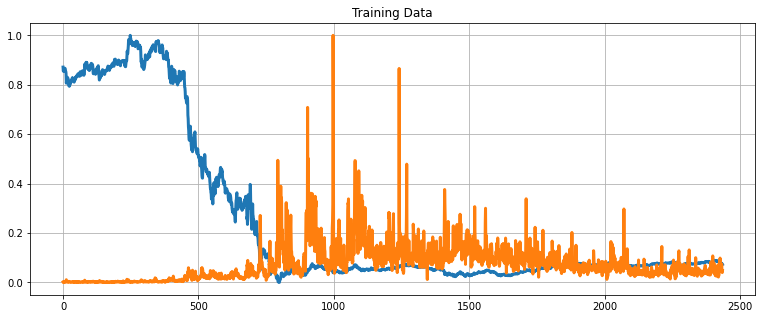

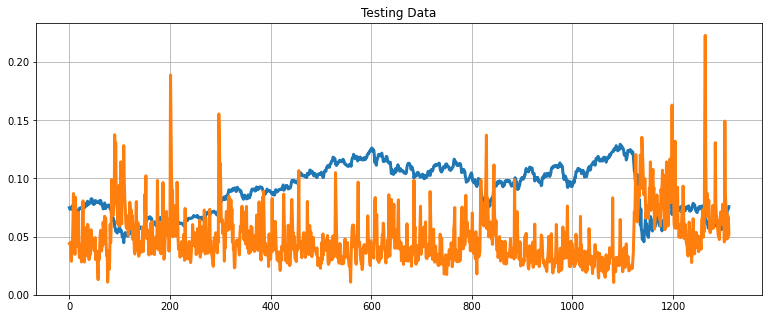

In [132]:
# Define a data plotting function
def show_plot(data, title):
  plt.figure(figsize = (13, 5))
  plt.plot(data, linewidth = 3)
  plt.title(title)
  plt.grid()

show_plot(X_train, 'Training Data')
show_plot(X_test, 'Testing Data')


In [133]:
# Let's test the created pipeline with BAC
price_volume_df = individual_stock(bank_stocks_close, bank_stocks_volume, 'BAC')
price_volume_df

,DATE,Close,Volume
0,2006-01-03,47.080002,16296700.0
1,2006-01-04,46.580002,17757900.0
2,2006-01-05,46.639999,14970700.0
3,2006-01-06,46.570000,12599800.0
4,2006-01-09,46.599998,15619400.0
...,...,...,...
3744,2020-11-16,27.580000,57396700.0
3745,2020-11-17,27.549999,46402300.0
3746,2020-11-18,26.980000,54416700.0
3747,2020-11-19,26.980000,46423000.0


In [134]:
price_volume_target_df = trading_window(price_volume_df)
price_volume_target_df

,DATE,Close,Volume,Target
0,2006-01-03,47.080002,16296700.0,46.580002
1,2006-01-04,46.580002,17757900.0,46.639999
2,2006-01-05,46.639999,14970700.0,46.570000
3,2006-01-06,46.570000,12599800.0,46.599998
4,2006-01-09,46.599998,15619400.0,46.209999
...,...,...,...,...
3744,2020-11-16,27.580000,57396700.0,27.549999
3745,2020-11-17,27.549999,46402300.0,26.980000
3746,2020-11-18,26.980000,54416700.0,26.980000
3747,2020-11-19,26.980000,46423000.0,26.809999


In [135]:
# Remove the last row as it will be a null value
price_volume_target_df = price_volume_target_df[:-1]
price_volume_target_df

,DATE,Close,Volume,Target
0,2006-01-03,47.080002,16296700.0,46.580002
1,2006-01-04,46.580002,17757900.0,46.639999
2,2006-01-05,46.639999,14970700.0,46.570000
3,2006-01-06,46.570000,12599800.0,46.599998
4,2006-01-09,46.599998,15619400.0,46.209999
...,...,...,...,...
3743,2020-11-13,27.000000,52421000.0,27.580000
3744,2020-11-16,27.580000,57396700.0,27.549999
3745,2020-11-17,27.549999,46402300.0,26.980000
3746,2020-11-18,26.980000,54416700.0,26.980000


In [136]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
price_volume_target_scaled_df = sc.fit_transform(price_volume_target_df.drop(columns = ['DATE']))

In [137]:
price_volume_target_scaled_df

array([[0.84891809, 0.00937947, 0.83925812],
       [0.83925812, 0.01057526, 0.84041727],
       [0.84041727, 0.00829433, 0.83906488],
       ...,
       [0.47159966, 0.03401669, 0.4605873 ],
       [0.4605873 , 0.04057536, 0.4605873 ],
       [0.4605873 , 0.03403363, 0.45730291]])

In [138]:
price_volume_target_scaled_df.shape

(3748, 3)

In [139]:
# Creating Feature and Target
X = price_volume_target_scaled_df[:,:2]
y = price_volume_target_scaled_df[:,2:]

In [140]:
X

array([[0.84891809, 0.00937947],
       [0.83925812, 0.01057526],
       [0.84041727, 0.00829433],
       ...,
       [0.47159966, 0.03401669],
       [0.4605873 , 0.04057536],
       [0.4605873 , 0.03403363]])

In [141]:
y

array([[0.83925812],
       [0.84041727],
       [0.83906488],
       ...,
       [0.4605873 ],
       [0.4605873 ],
       [0.45730291]])

In [142]:
# Converting dataframe to arrays
# X = np.asarray(X)
# y = np.asarray(y)
X.shape, y.shape

((3748, 2), (3748, 1))

In [143]:
# Spliting the data this way, since order is important in time-series
# Note that I did not use train test split with it's default settings since it shuffles the data
# split = int(0.65 * len(X))
# X_train = X[:split]
# y_train = y[:split]
# X_test = X[split:]
# y_test = y[split:]

In [144]:
# This 2436 will be used for training, and the rest for the testing
split = int(0.65 * len(X))
split

2436

In [145]:
X_train = X[:split]
X_train.shape

(2436, 2)

In [146]:
y_train = y[:split]
y_train.shape

(2436, 1)

In [147]:
X_test = X[split:]
y_test = y[split:]

In [148]:
X_test.shape

(1312, 2)

In [149]:
y_test.shape

(1312, 1)

In [150]:
X_train.shape, y_train.shape

((2436, 2), (2436, 1))

In [151]:
X_test.shape, y_test.shape

((1312, 2), (1312, 1))

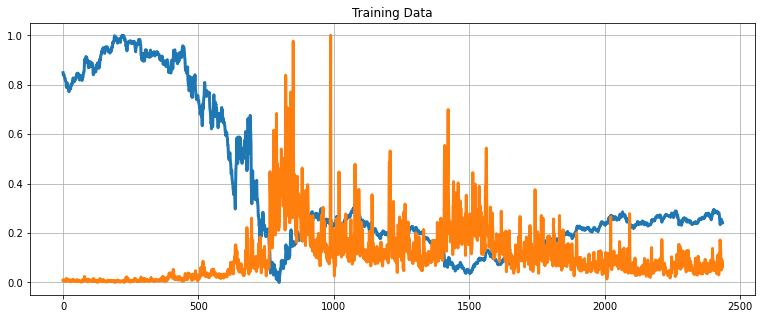

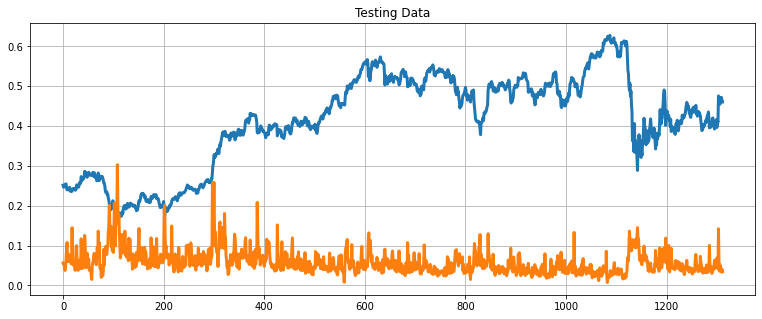

In [152]:
# Define a data plotting function
def show_plot(data, title):
  plt.figure(figsize = (13, 5))
  plt.plot(data, linewidth = 3)
  plt.title(title)
  plt.grid()

show_plot(X_train, 'Training Data')
show_plot(X_test, 'Testing Data')

# *Build And Train a Ridge Linear Regression Model*

- Ridge regression advantage is to avoid overfitting
- Ridge regression works by attempting at increasing the bias to improve variance
- This works by changing the slope of the line
- Ridge regression performs linear least squares with L2 regularization

In [153]:
from sklearn.linear_model import Ridge
# Create and train the Ridge Linear Regression Model
regression_model = Ridge()
regression_model.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [154]:
# Test the model and calculate its accuracy 
lr_accuracy = regression_model.score(X_test, y_test)
print("Linear Regression Score: ", lr_accuracy)

Linear Regression Score:  0.9930026896533864


In [155]:
# Make Prediction
predicted_prices = regression_model.predict(X)
predicted_prices

array([[0.84584176],
       [0.8362444 ],
       [0.83741082],
       ...,
       [0.47112151],
       [0.46014459],
       [0.46018984]])

In [156]:
# Append the predicted values into a list
Predicted = []
for i in predicted_prices:
  Predicted.append(i[0])

In [157]:
len(Predicted)

3748

In [158]:
# Append the close values to the list
close = []
for i in price_volume_target_scaled_df:
  close.append(i[0])

In [159]:
# Create a dataframe based on the dates in the individual stock data
df_predicted = price_volume_target_df[['DATE']]
df_predicted

,DATE
0,2006-01-03
1,2006-01-04
2,2006-01-05
3,2006-01-06
4,2006-01-09
...,...
3743,2020-11-13
3744,2020-11-16
3745,2020-11-17
3746,2020-11-18


In [160]:
# Add the close values to the dataframe
df_predicted['Close'] = close
df_predicted

,DATE,Close
0,2006-01-03,0.848918
1,2006-01-04,0.839258
2,2006-01-05,0.840417
3,2006-01-06,0.839065
4,2006-01-09,0.839644
...,...,...
3743,2020-11-13,0.460974
3744,2020-11-16,0.472179
3745,2020-11-17,0.471600
3746,2020-11-18,0.460587


In [161]:
# Add the predicted values to the dataframe
df_predicted['Prediction'] = Predicted
df_predicted

,DATE,Close,Prediction
0,2006-01-03,0.848918,0.845842
1,2006-01-04,0.839258,0.836244
2,2006-01-05,0.840417,0.837411
3,2006-01-06,0.839065,0.836082
4,2006-01-09,0.839644,0.836640
...,...,...,...
3743,2020-11-13,0.460974,0.460539
3744,2020-11-16,0.472179,0.471635
3745,2020-11-17,0.471600,0.471122
3746,2020-11-18,0.460587,0.460145


In [162]:
# Function to plot interactive plot
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['DATE'], y = df[i], name = i)
  fig.show()

In [163]:
# Plot the results
# Just zoom in to view
interactive_plot(df_predicted, "Original Vs. Prediction")

In [164]:
# Remember that the default value for alpha was 1. 
# Let's increase alpha to 4 for example to experiment with various regularization values 

In [165]:
from sklearn.linear_model import Ridge
# Note that Ridge regression performs linear least squares with L2 regularization.
# Create and train the Ridge Linear Regression Model
regression_model = Ridge(alpha = 4)
regression_model.fit(X_train, y_train)

Ridge(alpha=4, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [166]:
# Test the model and calculate its accuracy 
lr_accuracy = regression_model.score(X_test, y_test)
print("Linear Regression Score: ", lr_accuracy)

Linear Regression Score:  0.9926289047485058


In [167]:
# Make Prediction
predicted_prices = regression_model.predict(X)
predicted_prices

array([[0.83947839],
       [0.83003006],
       [0.83123477],
       ...,
       [0.47115929],
       [0.46021574],
       [0.46043289]])

In [168]:
# Append the predicted values into a list
Predicted = []
for i in predicted_prices:
  Predicted.append(i[0])

In [169]:
len(Predicted)

3748

In [170]:
# Append the close values to the list
close = []
for i in price_volume_target_scaled_df:
  close.append(i[0])

In [171]:
# Create a dataframe based on the dates in the individual stock data
df_predicted = price_volume_target_df[['DATE']]
df_predicted

,DATE
0,2006-01-03
1,2006-01-04
2,2006-01-05
3,2006-01-06
4,2006-01-09
...,...
3743,2020-11-13
3744,2020-11-16
3745,2020-11-17
3746,2020-11-18


In [172]:
# Add the close values to the dataframe
df_predicted['Close'] = close
df_predicted

,DATE,Close
0,2006-01-03,0.848918
1,2006-01-04,0.839258
2,2006-01-05,0.840417
3,2006-01-06,0.839065
4,2006-01-09,0.839644
...,...,...
3743,2020-11-13,0.460974
3744,2020-11-16,0.472179
3745,2020-11-17,0.471600
3746,2020-11-18,0.460587


In [173]:
# Add the predicted values to the dataframe
df_predicted['Prediction'] = Predicted
df_predicted

,DATE,Close,Prediction
0,2006-01-03,0.848918,0.839478
1,2006-01-04,0.839258,0.830030
2,2006-01-05,0.840417,0.831235
3,2006-01-06,0.839065,0.829982
4,2006-01-09,0.839644,0.830464
...,...,...,...
3743,2020-11-13,0.460974,0.460646
3744,2020-11-16,0.472179,0.471425
3745,2020-11-17,0.471600,0.471159
3746,2020-11-18,0.460587,0.460216


In [174]:
# Plot the results
# Just zoom in to view
interactive_plot(df_predicted, "Original Vs. Prediction")

Now that I have moved alpha from 1 to alpha = 4, the data is little bit shifted more; and this has a hudge impact of the accuracy of the model. As alpha increases, the model becomes less sensitive to the variations of the independent variable.

# *Train a Long Short-Term Memory Network (LSTM) Time Series Model For WFC & GS*

- LSTM networks work much better compared to vanilla RNN (Recurrent Neural Network) since they overcome the vanishing gradient problem.
- LSTM networks are type of RNN that are designed to remember long term dependencies by default
- LSTM can remember and recall information for a prolonged period of time
- LSTM contains gates that can allow or block information from passing by.

In [175]:
# Let's test the functions and get individual stock prices and volumes for Wells Fargo
price_volume_df = individual_stock(bank_stocks_close, bank_stocks_volume, 'WFC')
price_volume_df

,DATE,Close,Volume
0,2006-01-03,31.900000,11016400.0
1,2006-01-04,31.530001,10870000.0
2,2006-01-05,31.495001,10158000.0
3,2006-01-06,31.680000,8403800.0
4,2006-01-09,31.674999,5619600.0
...,...,...,...
3744,2020-11-16,24.900000,36954800.0
3745,2020-11-17,25.040001,29490400.0
3746,2020-11-18,25.059999,44318300.0
3747,2020-11-19,26.160000,44560000.0


In [176]:
# Get the close and volume data as training data (Input)
training_data = price_volume_df.iloc[:, 1:3].values
training_data

array([[3.18999996e+01, 1.10164000e+07],
       [3.15300007e+01, 1.08700000e+07],
       [3.14950008e+01, 1.01580000e+07],
       ...,
       [2.50599995e+01, 4.43183000e+07],
       [2.61599998e+01, 4.45600000e+07],
       [2.54799995e+01, 3.84252000e+07]])

In [177]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_data)

In [178]:
# Create the training and testing data, training data contains present day and previous day values
X = []
y = []
for i in range(1, len(price_volume_df)):
    X.append(training_set_scaled [i-1:i, 0])
    y.append(training_set_scaled [i, 0])

In [179]:
X

[array([0.41134751]),
 array([0.40494725]),
 array([0.40434182]),
 array([0.40754195]),
 array([0.40745544]),
 array([0.407023]),
 array([0.40987719]),
 array([0.4034769]),
 array([0.40659055]),
 array([0.40096868]),
 array([0.4096177]),
 array([0.40105519]),
 array([0.39145476]),
 array([0.39240616]),
 array([0.39223318]),
 array([0.39577928]),
 array([0.40070922]),
 array([0.4018336]),
 array([0.39984433]),
 array([0.39889293]),
 array([0.39439543]),
 array([0.38972495]),
 array([0.38747622]),
 array([0.3875627]),
 array([0.38825464]),
 array([0.38998445]),
 array([0.38911952]),
 array([0.39344404]),
 array([0.39275213]),
 array([0.40140115]),
 array([0.40866633]),
 array([0.41264488]),
 array([0.40970421]),
 array([0.40883929]),
 array([0.41645043]),
 array([0.41645043]),
 array([0.41800726]),
 array([0.41731532]),
 array([0.4148071]),
 array([0.41904517]),
 array([0.41169348]),
 array([0.41152049]),
 array([0.41065561]),
 array([0.41731532]),
 array([0.41662345]),
 array([0.4122989

In [180]:
# Convert the data into array format
X = np.asarray(X)
y = np.asarray(y)

In [181]:
# Split the data
# 70% will be used for training, and the rest (30%) for the testing
split = int(0.7 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [182]:
# Reshape the 1D arrays to 3D arrays to feed in the model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_train.shape, X_test.shape

((2623, 1, 1), (1125, 1, 1))

In [183]:
X_train.shape[1]

1

In [184]:
X_train.shape[0]

2623

In [185]:
X_train.shape[2]

1

In [186]:
# Create the model
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(150, return_sequences= True)(inputs)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150, return_sequences=True)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150)(x)
outputs = keras.layers.Dense(1, activation='linear')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss="mse")
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1, 1)]            0         
_________________________________________________________________
lstm (LSTM)                  (None, 1, 150)            91200     
_________________________________________________________________
dropout (Dropout)            (None, 1, 150)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 150)            180600    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 150)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 150)               180600    
_________________________________________________________________
dense (Dense)                (None, 1)                 151   

In [187]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs = 20,
    batch_size = 32,
    validation_split = 0.2
)

Epoch 1/20
66/66 [==============================] - 6s 22ms/step - loss: 0.0422 - val_loss: 0.0517
Epoch 2/20
66/66 [==============================] - 1s 8ms/step - loss: 0.0045 - val_loss: 0.0166
Epoch 3/20
66/66 [==============================] - 1s 8ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 4/20
66/66 [==============================] - 1s 8ms/step - loss: 9.6544e-04 - val_loss: 4.0354e-04
Epoch 5/20
66/66 [==============================] - 1s 8ms/step - loss: 7.9355e-04 - val_loss: 1.6380e-04
Epoch 6/20
66/66 [==============================] - 1s 8ms/step - loss: 7.6117e-04 - val_loss: 2.2952e-04
Epoch 7/20
66/66 [==============================] - 1s 8ms/step - loss: 6.8634e-04 - val_loss: 3.7784e-04
Epoch 8/20
66/66 [==============================] - 1s 8ms/step - loss: 6.2922e-04 - val_loss: 3.2881e-04
Epoch 9/20
66/66 [==============================] - 1s 8ms/step - loss: 5.8863e-04 - val_loss: 1.5391e-04
Epoch 10/20
66/66 [==============================] - 1s 9ms/step - lo

In [188]:
# Make prediction
predicted = model.predict(X)

In [189]:
# Append the predicted values to the list
test_predicted = []

for i in predicted:
  test_predicted.append(i[0])

In [190]:
test_predicted

[0.4100985,
 0.4036791,
 0.40307197,
 0.4062813,
 0.4061946,
 0.40576085,
 0.4086236,
 0.40220457,
 0.40532714,
 0.39968958,
 0.4083633,
 0.3997763,
 0.3901523,
 0.39110583,
 0.39093247,
 0.39448687,
 0.39942938,
 0.4005568,
 0.39856222,
 0.39760834,
 0.39309978,
 0.38841867,
 0.38616523,
 0.38625187,
 0.38694525,
 0.38867873,
 0.3878119,
 0.39214608,
 0.39145258,
 0.40012318,
 0.4074091,
 0.4113999,
 0.40845007,
 0.40758255,
 0.41521785,
 0.41521785,
 0.41677985,
 0.41608557,
 0.41356906,
 0.4178213,
 0.41044548,
 0.4102719,
 0.4094044,
 0.41608557,
 0.4153914,
 0.41105282,
 0.4140029,
 0.41495752,
 0.41981742,
 0.41964394,
 0.41999108,
 0.42103255,
 0.4216402,
 0.4194703,
 0.42372352,
 0.42025143,
 0.42033827,
 0.41990423,
 0.4123543,
 0.41356906,
 0.41296166,
 0.41070578,
 0.4146971,
 0.4193835,
 0.4216402,
 0.41999108,
 0.41504428,
 0.4153914,
 0.41513097,
 0.41521785,
 0.41747412,
 0.41582528,
 0.42103255,
 0.41816843,
 0.42077217,
 0.42077217,
 0.42137977,
 0.42129296,
 0.4257200

In [191]:
df_predicted = price_volume_df[1:][['DATE', 'Close']]
df_predicted

,DATE,Close
1,2006-01-04,31.530001
2,2006-01-05,31.495001
3,2006-01-06,31.680000
4,2006-01-09,31.674999
5,2006-01-10,31.650000
...,...,...
3744,2020-11-16,24.900000
3745,2020-11-17,25.040001
3746,2020-11-18,25.059999
3747,2020-11-19,26.160000


In [192]:
df_predicted['predictions'] = test_predicted

In [193]:
df_predicted

,DATE,Close,predictions
1,2006-01-04,31.530001,0.410098
2,2006-01-05,31.495001,0.403679
3,2006-01-06,31.680000,0.403072
4,2006-01-09,31.674999,0.406281
5,2006-01-10,31.650000,0.406195
...,...,...,...
3744,2020-11-16,24.900000,0.274710
3745,2020-11-17,25.040001,0.289009
3746,2020-11-18,25.059999,0.291422
3747,2020-11-19,26.160000,0.291766


In [194]:
# Plot the data
close = []
for i in training_set_scaled:
  close.append(i[0])

In [195]:
close

[0.4113475101256341,
 0.4049472518796713,
 0.40434182293730725,
 0.40754195206028876,
 0.40745544335800654,
 0.40702299882680404,
 0.40987719212086515,
 0.40347690088149957,
 0.40659055429560165,
 0.4009686764097615,
 0.4096176990074216,
 0.40105518511204374,
 0.39145476474969665,
 0.39240616251438365,
 0.3922331781032221,
 0.3957792760485266,
 0.40070921628972056,
 0.4018335984655693,
 0.39984432722731567,
 0.39889292946262866,
 0.3943954337526372,
 0.3897249536314841,
 0.3874762222731897,
 0.387562697982069,
 0.38825463562671514,
 0.3899844467449278,
 0.38911952468912003,
 0.3934440359879501,
 0.3927521313367067,
 0.4014011539343667,
 0.4086663342361373,
 0.41264487671264427,
 0.4097042077097037,
 0.40883928565389605,
 0.4164504347779896,
 0.4164504347779896,
 0.41800726148504064,
 0.4173153238403946,
 0.41480709936865623,
 0.41904516795200986,
 0.41169347894795716,
 0.4115204945367956,
 0.41065560547439073,
 0.4173153238403946,
 0.41662345218255414,
 0.4122989078903211,
 0.415239576

In [196]:
df_predicted['Close'] = close[1:]

In [197]:
df_predicted

,DATE,Close,predictions
1,2006-01-04,0.404947,0.410098
2,2006-01-05,0.404342,0.403679
3,2006-01-06,0.407542,0.403072
4,2006-01-09,0.407455,0.406281
5,2006-01-10,0.407023,0.406195
...,...,...,...
3744,2020-11-16,0.290261,0.274710
3745,2020-11-17,0.292683,0.289009
3746,2020-11-18,0.293029,0.291422
3747,2020-11-19,0.312057,0.291766


In [198]:
# Plot the data
# Just zoom in to view
interactive_plot(df_predicted, "Original Price Vs LSTM Predictions for WFC")

In [199]:
# Let's test the pipeline with Goldman Sachs
price_volume_df = individual_stock(bank_stocks_close, bank_stocks_volume, 'GS')
price_volume_df

,DATE,Close,Volume
0,2006-01-03,128.869995,6188700.0
1,2006-01-04,127.089996,4861600.0
2,2006-01-05,127.040001,3717400.0
3,2006-01-06,128.839996,4319600.0
4,2006-01-09,130.389999,4723500.0
...,...,...,...
3744,2020-11-16,222.380005,3004700.0
3745,2020-11-17,224.649994,2722900.0
3746,2020-11-18,224.300003,2856200.0
3747,2020-11-19,224.570007,1505200.0


In [200]:
# Get the close and volume data as training data (Input)
training_data = price_volume_df.iloc[:, 1:3].values
training_data

array([[1.28869995e+02, 6.18870000e+06],
       [1.27089996e+02, 4.86160000e+06],
       [1.27040001e+02, 3.71740000e+06],
       ...,
       [2.24300003e+02, 2.85620000e+06],
       [2.24570007e+02, 1.50520000e+06],
       [2.23350006e+02, 1.84810000e+06]])

In [201]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_data)

In [202]:
# Create the training and testing data, training data contains present day and previous day values
X = []
y = []
for i in range(1, len(price_volume_df)):
    X.append(training_set_scaled [i-1:i, 0])
    y.append(training_set_scaled [i, 0])

In [203]:
X

[array([0.34723098]),
 array([0.33919051]),
 array([0.33896467]),
 array([0.34709547]),
 array([0.35409702]),
 array([0.36150509]),
 array([0.36123407]),
 array([0.36249886]),
 array([0.36706113]),
 array([0.36403467]),
 array([0.3630409]),
 array([0.36959077]),
 array([0.35884001]),
 array([0.36529945]),
 array([0.3658867]),
 array([0.36841628]),
 array([0.385762]),
 array([0.39271841]),
 array([0.39691929]),
 array([0.40315294]),
 array([0.40523085]),
 array([0.4088897]),
 array([0.40988347]),
 array([0.41024485]),
 array([0.39515762]),
 array([0.40265605]),
 array([0.40134612]),
 array([0.4011654]),
 array([0.39592552]),
 array([0.40554701]),
 array([0.42072453]),
 array([0.42415752]),
 array([0.42253135]),
 array([0.41309059]),
 array([0.42248621]),
 array([0.41539437]),
 array([0.41629778]),
 array([0.41476197]),
 array([0.4033336]),
 array([0.41173544]),
 array([0.41557502]),
 array([0.42460926]),
 array([0.4201825]),
 array([0.41683981]),
 array([0.40875419]),
 array([0.40518563

In [204]:
# Convert the data into array format
X = np.asarray(X)
y = np.asarray(y)

In [205]:
# Split the data
# 70% will be used for training, and the rest (30%) for the testing
split = int(0.7 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [206]:
# Reshape the 1D arrays to 3D arrays to feed in the model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_train.shape, X_test.shape

((2623, 1, 1), (1125, 1, 1))

In [207]:
X_train.shape[1]

1

In [208]:
X_train.shape[0]

2623

In [209]:
X_train.shape[2]

1

In [210]:
# Create the model
# Change LSTM from 150 to 300
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(300, return_sequences= True)(inputs)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(300, return_sequences=True)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(300)(x)
outputs = keras.layers.Dense(1, activation='linear')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss="mse")
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1, 1)]            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 1, 300)            362400    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 300)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 1, 300)            721200    
_________________________________________________________________
dropout_3 (Dropout)          (None, 1, 300)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 300)               721200    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 301 

In [211]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs = 20,
    batch_size = 32,
    validation_split = 0.2
)

Epoch 1/20
66/66 [==============================] - 6s 31ms/step - loss: 0.0427 - val_loss: 0.0018
Epoch 2/20
66/66 [==============================] - 1s 17ms/step - loss: 0.0023 - val_loss: 1.9379e-04
Epoch 3/20
66/66 [==============================] - 1s 17ms/step - loss: 8.2231e-04 - val_loss: 1.4879e-04
Epoch 4/20
66/66 [==============================] - 1s 17ms/step - loss: 7.4978e-04 - val_loss: 2.0456e-04
Epoch 5/20
66/66 [==============================] - 1s 17ms/step - loss: 7.0486e-04 - val_loss: 1.4841e-04
Epoch 6/20
66/66 [==============================] - 1s 18ms/step - loss: 7.1735e-04 - val_loss: 7.0041e-04
Epoch 7/20
66/66 [==============================] - 1s 17ms/step - loss: 7.1023e-04 - val_loss: 1.3657e-04
Epoch 8/20
66/66 [==============================] - 1s 17ms/step - loss: 6.5285e-04 - val_loss: 1.3828e-04
Epoch 9/20
66/66 [==============================] - 1s 17ms/step - loss: 6.5563e-04 - val_loss: 1.2845e-04
Epoch 10/20
66/66 [==============================

In [212]:
# Make prediction
predicted = model.predict(X)

In [213]:
# Append the predicted values to the list
test_predicted = []

for i in predicted:
  test_predicted.append(i[0])

In [214]:
test_predicted

[0.34941807,
 0.34143385,
 0.34120953,
 0.34928352,
 0.3562335,
 0.3635844,
 0.36331555,
 0.3645703,
 0.3690957,
 0.36609378,
 0.365108,
 0.3716044,
 0.36094028,
 0.36734837,
 0.3679309,
 0.37043968,
 0.38763392,
 0.394525,
 0.39868516,
 0.40485647,
 0.4069131,
 0.410534,
 0.41151726,
 0.41187483,
 0.39694062,
 0.40436465,
 0.40306795,
 0.402889,
 0.39770108,
 0.40722606,
 0.42224047,
 0.4256347,
 0.424027,
 0.41469026,
 0.42398232,
 0.41696912,
 0.41786268,
 0.41634357,
 0.40503532,
 0.4133496,
 0.41714785,
 0.42608127,
 0.4217045,
 0.41839874,
 0.41039988,
 0.4068684,
 0.40610835,
 0.40248662,
 0.44134623,
 0.43947238,
 0.43362626,
 0.4455392,
 0.4536545,
 0.441257,
 0.45204967,
 0.45138097,
 0.45360997,
 0.46622032,
 0.46247846,
 0.47468072,
 0.4742801,
 0.4749478,
 0.4801106,
 0.49292064,
 0.4918091,
 0.49754363,
 0.49300954,
 0.49941018,
 0.4846933,
 0.48633915,
 0.48593876,
 0.4970992,
 0.5131349,
 0.51979244,
 0.5264467,
 0.51464427,
 0.512247,
 0.500921,
 0.50358677,
 0.5061188

In [215]:
df_predicted = price_volume_df[1:][['DATE', 'Close']]
df_predicted

,DATE,Close
1,2006-01-04,127.089996
2,2006-01-05,127.040001
3,2006-01-06,128.839996
4,2006-01-09,130.389999
5,2006-01-10,132.029999
...,...,...
3744,2020-11-16,222.380005
3745,2020-11-17,224.649994
3746,2020-11-18,224.300003
3747,2020-11-19,224.570007


In [216]:
df_predicted['predictions'] = test_predicted

In [217]:
df_predicted

,DATE,Close,predictions
1,2006-01-04,127.089996,0.349418
2,2006-01-05,127.040001,0.341434
3,2006-01-06,128.839996,0.341210
4,2006-01-09,130.389999,0.349284
5,2006-01-10,132.029999,0.356234
...,...,...,...
3744,2020-11-16,222.380005,0.748391
3745,2020-11-17,224.649994,0.762716
3746,2020-11-18,224.300003,0.772557
3747,2020-11-19,224.570007,0.771040


In [218]:
# Plot the data
close = []
for i in training_set_scaled:
  close.append(i[0])

In [219]:
close

[0.3472309757960238,
 0.3391905080932649,
 0.3389646727817617,
 0.3470954677165441,
 0.35409701716803277,
 0.36150509085796056,
 0.36123407469900115,
 0.3624988627246636,
 0.3670611288939618,
 0.36403466690928543,
 0.3630408950425824,
 0.36959077387106487,
 0.35884000672715577,
 0.36529945493494786,
 0.3658867025632119,
 0.36841627861453685,
 0.3857620020457171,
 0.39271840511263834,
 0.396919293428065,
 0.40315294078724273,
 0.40523084621556127,
 0.40888970221306886,
 0.409883474079772,
 0.4102448519336438,
 0.3951576194690509,
 0.4026560548538911,
 0.40134612044366147,
 0.4011653970538366,
 0.39592552156136185,
 0.4055470087590879,
 0.4207245339928152,
 0.4241575202159307,
 0.42253135433639644,
 0.4130905905284953,
 0.4224862079518291,
 0.41539436573120603,
 0.41629777590299666,
 0.4147619717183748,
 0.40333359525128964,
 0.41173544080792046,
 0.41557502019525294,
 0.424609259764715,
 0.42018250167489646,
 0.4168398082209154,
 0.40875419413358915,
 0.4051856309052161,
 0.404417728812

In [220]:
df_predicted['Close'] = close[1:]

In [221]:
df_predicted

,DATE,Close,predictions
1,2006-01-04,0.339191,0.349418
2,2006-01-05,0.338965,0.341434
3,2006-01-06,0.347095,0.341210
4,2006-01-09,0.354097,0.349284
5,2006-01-10,0.361505,0.356234
...,...,...,...
3744,2020-11-16,0.769627,0.748391
3745,2020-11-17,0.779881,0.762716
3746,2020-11-18,0.778300,0.772557
3747,2020-11-19,0.779519,0.771040


In [222]:
# Plot the data
# Just zoom in to view
interactive_plot(df_predicted, "Original Price Vs LSTM Predictions for GS")